In [1]:
pip install --pre pycaret 

  Using cached pycaret-3.0.0rc4-py3-none-any.whl (487 kB)
  Using cached tbats-1.1.1-py3-none-any.whl (43 kB)
     -------------------------------------- 133.1/133.1 kB 1.1 MB/s eta 0:00:00
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached importlib_metadata-5.0.0-py3-none-any.whl (21 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached pyod-1.0.5.tar.gz (137 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.2/7.2 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 kB 835.0 kB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 15.2/15.2 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 14.7/14.7 MB 5.6 MB/s eta 0:00:00
  Us

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape(data)

In [3]:
from pycaret.regression import *

In [4]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 10)"
4,Train data shape,"(936, 10)"
5,Test data shape,"(402, 10)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


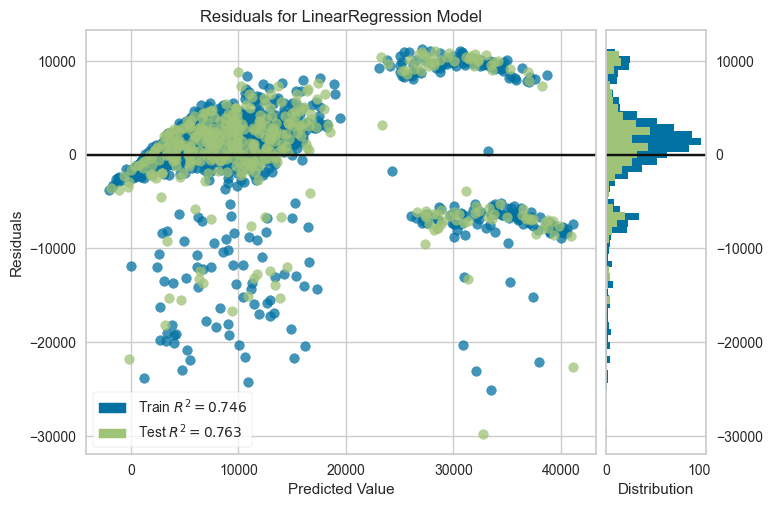

In [6]:
plot_model(lr)

Second Model

In [10]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True,
            #trigonometry_features = True,
            #feature_interaction=True, 
           #bin_numeric_features= ['age', 'bmi']
           )

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Data shape,"(1338, 49)"
4,Train data shape,"(936, 49)"
5,Test data shape,"(402, 49)"
6,Ordinal features,2
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [12]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3006.9077,21591875.3097,4646.7059,0.8710,0.3808,0.2993
1,3363.2011,32800450.2609,5727.1677,0.8093,0.4379,0.2998
2,3120.0127,22958486.0092,4791.5014,0.7093,0.5027,0.3950
3,2876.9539,19961763.8958,4467.8590,0.8333,0.4476,0.3788
4,3119.8468,28163417.0759,5306.9216,0.7905,0.4964,0.2968
5,3119.9923,24039872.7027,4903.0473,0.8454,0.5296,0.3044
6,2747.9805,21904800.6243,4680.2565,0.8510,0.3669,0.2913
7,3414.0387,29975357.8753,5474.9756,0.8352,0.4554,0.2907
8,3275.6823,25179081.6519,5017.8762,0.8374,0.4236,0.3658


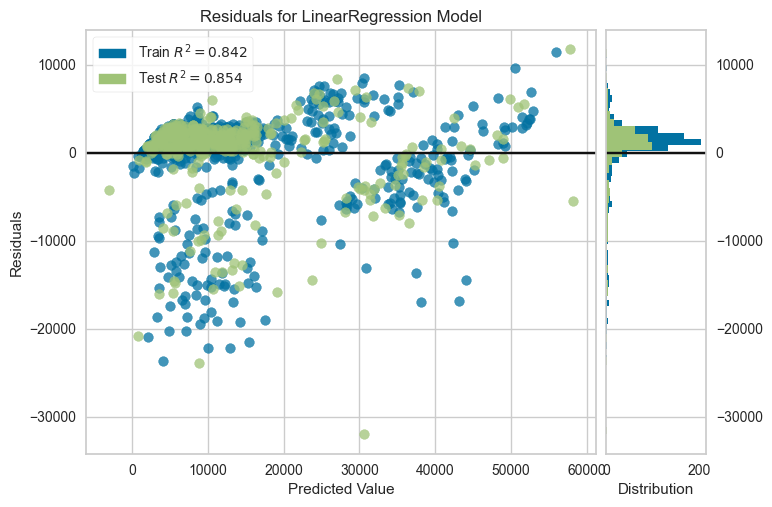

In [13]:
plot_model(lr)

In [14]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\ZEE\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('ordinal_encoding',
                  T...
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
       

In [15]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [16]:
deployment_28042020


Pipeline(memory=Memory(location=C:\Users\ZEE\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('ordinal_encoding',
                 T...
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [17]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75716.0
